<a href="https://colab.research.google.com/github/flamorim/BI-Master-2021.1/blob/main/trab_DM_2021_08_25_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importas as Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importa a base de dados

In [ ]:
#dataset = pd.read_excel('base-comentada-2021.08.21.xlsx', sheet_name='ItemVenda_Neutro')
dataset = pd.read_csv('ItemVenda_Neutro.csv')
dataset.head()

,idNotaVenda,idProduto,quantidade,descontoUnitario,valorUnitario
0,1,7465,1.0,5.00,12.99
1,1,12391,2.0,1.19,7.99
2,2,41988,1.0,-4.85,39.90
3,2,47023,1.0,-0.26,72.99
4,3,13779,60.0,0.66,1.65


In [ ]:
dataset = dataset.rename(columns={"Coluna1": "valortotalvenda"})
dataset = dataset.rename(columns={"valorUnitario": "valorunitario"})
dataset = dataset.rename(columns={"descontoUnitario": "descontounitario"})
dataset = dataset.rename(columns={"dataVenda": "datavenda"})
dataset = dataset.rename(columns={"idNotaVenda": "idNotavenda"})
#dataset = dataset.drop(columns={"Unnamed: 7","Unnamed: 8"})

dataset.head()


,idNotavenda,idProduto,quantidade,descontounitario,valorunitario
0,1,7465,1.0,5.00,12.99
1,1,12391,2.0,1.19,7.99
2,2,41988,1.0,-4.85,39.90
3,2,47023,1.0,-0.26,72.99
4,3,13779,60.0,0.66,1.65


In [ ]:
#dataset["mes"] = dataset["MS"] + dataset["ANO"].astype(str)
#dataset['dataVenda'].astype(str).
#dataset = dataset.rename(columns={"Coluna1": "valor"})
dataset.head()


,idNotavenda,idProduto,quantidade,descontounitario,valorunitario
0,1,7465,1.0,5.00,12.99
1,1,12391,2.0,1.19,7.99
2,2,41988,1.0,-4.85,39.90
3,2,47023,1.0,-0.26,72.99
4,3,13779,60.0,0.66,1.65


In [ ]:
dataset.describe()

,idNotavenda,idProduto,quantidade,descontounitario,valorunitario
count,353801.000000,353801.000000,353801.000000,353801.000000,353801.000000
mean,60413.324849,23216.141721,6.017453,6.598253,41.498397
std,32556.921301,15538.277096,148.506703,24.617135,135.203989
min,1.000000,7.000000,0.000000,-710.010000,0.000000
25%,32083.000000,10086.000000,1.000000,0.000000,6.190000
50%,61242.000000,20896.000000,1.000000,0.000000,14.990000
75%,88461.000000,38419.000000,2.000000,4.410000,32.990000
max,115325.000000,47816.000000,40305.440000,1900.910000,5890.000000


In [ ]:
#erro na base com desconto negativo. O cliente relatou que é só trocar o sinal
dataset['descontounitario']=dataset['descontounitario'].abs()

In [ ]:
dataset['descontounitario']

0         5.00
1         1.19
2         4.85
3         0.26
4         0.66
          ... 
353796    2.26
353797    1.26
353798    1.60
353799    1.90
353800    1.58
Name: descontounitario, Length: 353801, dtype: float64

In [ ]:
#como a coluna desconto apresentava alguns erros, a coluna valortotalvenda foi refeita
dataset['valortotalvenda']=dataset['quantidade']*(dataset['valorunitario']-dataset['descontounitario'])

In [ ]:
dataset.head()

,idNotavenda,idProduto,quantidade,descontounitario,valorunitario,valortotalvenda
0,1,7465,1.0,5.00,12.99,7.99
1,1,12391,2.0,1.19,7.99,13.60
2,2,41988,1.0,4.85,39.90,35.05
3,2,47023,1.0,0.26,72.99,72.73
4,3,13779,60.0,0.66,1.65,59.40


In [ ]:
#este fica em ingles
#dataset['mes'] = dataset['datavenda'].dt.strftime('%b')
#pegar a data de venda de uma outra tabela
dataset_datavenda = pd.read_excel('base-comentada-2021.08.21.xlsx', sheet_name='ItemVenda_Neutro')
dataset['datavenda'] = dataset_datavenda['dataVenda']

In [ ]:
dataset.head()

,idNotavenda,idProduto,quantidade,descontounitario,valorunitario,valortotalvenda,datavenda
0,1,7465,1.0,5.00,12.99,7.99,2018-12-08
1,1,12391,2.0,1.19,7.99,13.60,2018-12-08
2,2,41988,1.0,4.85,39.90,35.05,2018-10-26
3,2,47023,1.0,0.26,72.99,72.73,2018-10-26
4,3,13779,60.0,0.66,1.65,59.40,2018-09-25


In [ ]:
#Funcionando
abreviado = {}
abreviado[1] = '01-01'
abreviado[2] = '02-01'
abreviado[3] = '03-01'
abreviado[4] = '04-01'
abreviado[5] = '05-01'
abreviado[6] = '06-01'
abreviado[7] = '07-01'
abreviado[8] = '08-01'
abreviado[9] = '09-01'
abreviado[10] = '10-01'
abreviado[11] = '11-01'
abreviado[12] = '12-01'

dataset['mesabreviado'] = dataset['datavenda'].dt.month.map(abreviado)


In [ ]:
dataset.head()

,idNotavenda,idProduto,quantidade,descontounitario,valorunitario,valortotalvenda,datavenda,mesabreviado
0,1,7465,1.0,5.00,12.99,7.99,2018-12-08,12-01
1,1,12391,2.0,1.19,7.99,13.60,2018-12-08,12-01
2,2,41988,1.0,4.85,39.90,35.05,2018-10-26,10-01
3,2,47023,1.0,0.26,72.99,72.73,2018-10-26,10-01
4,3,13779,60.0,0.66,1.65,59.40,2018-09-25,09-01


In [ ]:
dataset['anoabreviado'] = dataset['datavenda'].dt.year
#dataset['dataabreviada']=dataset['dataabreviada'] + dataset['temp']
dataset.head()

,idNotavenda,idProduto,quantidade,descontounitario,valorunitario,valortotalvenda,datavenda,mesabreviado,anoabreviado
0,1,7465,1.0,5.00,12.99,7.99,2018-12-08,12-01,2018
1,1,12391,2.0,1.19,7.99,13.60,2018-12-08,12-01,2018
2,2,41988,1.0,4.85,39.90,35.05,2018-10-26,10-01,2018
3,2,47023,1.0,0.26,72.99,72.73,2018-10-26,10-01,2018
4,3,13779,60.0,0.66,1.65,59.40,2018-09-25,09-01,2018


In [ ]:
#dataset['dataabreviada'] = dataset['datavenda']
#IMPORTANTE
#dataset.info()
dataset['temp'] = dataset['anoabreviado'].astype(str) + "-" + dataset['mesabreviado'].astype(str) 
#dataset['dataabreviada'] = dataset['mesabreviado'].astype(str) + "/" + dataset['anoabreviado'].astype(str)
#dataset.info()
#dataset.head()
#==================funcionou==========================
dataset['dataabreviada'] =dataset['temp'].apply(pd.to_datetime)
dataset = dataset.drop(columns={'temp'})

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353801 entries, 0 to 353800
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   idNotavenda       353801 non-null  int64         
 1   idProduto         353801 non-null  int64         
 2   quantidade        353801 non-null  float64       
 3   descontounitario  353801 non-null  float64       
 4   valorunitario     353801 non-null  float64       
 5   valortotalvenda   353801 non-null  float64       
 6   datavenda         353801 non-null  datetime64[ns]
 7   mesabreviado      353801 non-null  object        
 8   anoabreviado      353801 non-null  int64         
 9   temp              353801 non-null  object        
 10  dataabreviada     353801 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 29.7+ MB


In [ ]:
dataset.head()

,idNotavenda,idProduto,quantidade,descontounitario,valorunitario,valortotalvenda,datavenda,mesabreviado,anoabreviado,temp,dataabreviada
0,1,7465,1.0,5.00,12.99,7.99,2018-12-08,12-01,2018,2018-12-01,2018-12-01
1,1,12391,2.0,1.19,7.99,13.60,2018-12-08,12-01,2018,2018-12-01,2018-12-01
2,2,41988,1.0,4.85,39.90,35.05,2018-10-26,10-01,2018,2018-10-01,2018-10-01
3,2,47023,1.0,0.26,72.99,72.73,2018-10-26,10-01,2018,2018-10-01,2018-10-01
4,3,13779,60.0,0.66,1.65,59.40,2018-09-25,09-01,2018,2018-09-01,2018-09-01


In [ ]:
dataset = dataset.drop(columns={"mesabreviado","anoabreviado"})

In [ ]:
dataset.head(20)

,idNotavenda,idProduto,quantidade,descontounitario,valorunitario,valortotalvenda,datavenda,temp,dataabreviada
0,1,7465,1.0,5.00,12.99,7.99,2018-12-08,2018-12-01,2018-12-01
1,1,12391,2.0,1.19,7.99,13.60,2018-12-08,2018-12-01,2018-12-01
2,2,41988,1.0,4.85,39.90,35.05,2018-10-26,2018-10-01,2018-10-01
3,2,47023,1.0,0.26,72.99,72.73,2018-10-26,2018-10-01,2018-10-01
4,3,13779,60.0,0.66,1.65,59.40,2018-09-25,2018-09-01,2018-09-01
5,3,13785,20.0,0.66,1.65,19.80,2018-09-25,2018-09-01,2018-09-01
6,4,596,6.0,0.00,5.90,35.40,2018-10-11,2018-10-01,2018-10-01
7,5,26389,2.0,0.00,46.99,93.98,2018-10-11,2018-10-01,2018-10-01
8,6,2659,2.0,0.16,2.99,5.66,2018-10-11,2018-10-01,2018-10-01
9,6,2718,1.0,0.14,2.99,2.85,2018-10-11,2018-10-01,2018-10-01


In [ ]:
#dataset[ order(-dd[,4], dd[,1]), ]


dataset.sort_values(['dataabreviada','idNotavenda'], ascending=[False,True],inplace=True)
dataset.head()

,idNotavenda,idProduto,quantidade,descontounitario,valorunitario,valortotalvenda,datavenda,temp,dataabreviada
0,1,7465,1.0,5.00,12.99,7.99,2018-12-08,2018-12-01,2018-12-01
1,1,12391,2.0,1.19,7.99,13.60,2018-12-08,2018-12-01,2018-12-01
90,53,41982,1.0,2.61,41.99,39.38,2018-12-07,2018-12-01,2018-12-01
91,54,635,4.0,18.53,40.99,89.84,2018-12-05,2018-12-01,2018-12-01
148,58,1507,2.0,123.51,201.90,156.78,2018-12-07,2018-12-01,2018-12-01


In [ ]:
dataset.reset_index(drop=True,inplace=True)
dataset.head()

,idNotavenda,idProduto,quantidade,descontounitario,valorunitario,valortotalvenda,datavenda,temp,dataabreviada
0,1,7465,1.0,5.00,12.99,7.99,2018-12-08,2018-12-01,2018-12-01
1,1,12391,2.0,1.19,7.99,13.60,2018-12-08,2018-12-01,2018-12-01
2,53,41982,1.0,2.61,41.99,39.38,2018-12-07,2018-12-01,2018-12-01
3,54,635,4.0,18.53,40.99,89.84,2018-12-05,2018-12-01,2018-12-01
4,58,1507,2.0,123.51,201.90,156.78,2018-12-07,2018-12-01,2018-12-01


In [ ]:
dataset['quantidade'].isnull().values.any()

False

In [ ]:
dataset.describe()

,idNotavenda,idProduto,quantidade,descontounitario,valorunitario,valortotalvenda
count,353801.000000,353801.000000,353801.000000,353801.000000,353801.000000,353801.000000
mean,60413.324849,23216.141721,6.017453,6.614984,41.498397,75.671342
std,32556.921301,15538.277096,148.506703,24.612645,135.203989,787.685883
min,1.000000,7.000000,0.000000,0.000000,0.000000,-4815.216000
25%,32083.000000,10086.000000,1.000000,0.000000,6.190000,8.990000
50%,61242.000000,20896.000000,1.000000,0.000000,14.990000,19.990000
75%,88461.000000,38419.000000,2.000000,4.410000,32.990000,57.990000
max,115325.000000,47816.000000,40305.440000,1900.910000,5890.000000,274977.500000


In [ ]:
dataset['valorunitario'].isnull().values.any()

False

In [ ]:
dataset['valorunitario'].min()

0.0

In [ ]:
dataset['valorunitario'] == 0

0         False
1         False
2         False
3         False
4         False
          ...  
353796    False
353797    False
353798    False
353799    False
353800    False
Name: valorunitario, Length: 353801, dtype: bool

In [ ]:
#varias linhas com valor unitario zero
dataset[dataset.valorunitario == 0]

,idNotavenda,idProduto,quantidade,descontounitario,valorunitario,valortotalvenda,datavenda,temp,dataabreviada
1136,2331,18743,1.0,2.40,0.0,-2.40,2018-12-22,2018-12-01,2018-12-01
37765,52547,47674,1.0,19.67,0.0,-19.67,2018-12-18,2018-12-01,2018-12-01
41364,53593,47630,1.0,19.47,0.0,-19.47,2018-12-28,2018-12-01,2018-12-01
109183,2433,47457,8.0,13.12,0.0,-104.96,2018-11-27,2018-11-01,2018-11-01
141490,40187,43224,6.0,0.00,0.0,0.00,2018-11-22,2018-11-01,2018-11-01
...,...,...,...,...,...,...,...,...,...
325618,115111,46525,1.0,28.61,0.0,-28.61,2018-10-17,2018-10-01,2018-10-01
325619,115111,46526,1.0,28.61,0.0,-28.61,2018-10-17,2018-10-01,2018-10-01
325620,115111,46527,1.0,33.91,0.0,-33.91,2018-10-17,2018-10-01,2018-10-01
325621,115111,46530,1.0,22.39,0.0,-22.39,2018-10-17,2018-10-01,2018-10-01


In [ ]:
#apagar as linhas que tem produto com valor zero
dataset.shape


In [ ]:
dataset = dataset.loc[dataset['valorunitario'] != 0]
dataset.shape

(353710, 9)

In [ ]:
dataset['valorunitario'].min()

0.01

In [ ]:
dataset['valortotalvenda'].min()

-2200.08

In [ ]:
dataset.describe()
#confirmado que tem valortotalvenda negativo

,idNotavenda,idProduto,quantidade,descontounitario,valorunitario,valortotalvenda
count,353710.000000,353710.000000,353710.00000,353710.000000,353710.000000,353710.000000
mean,60420.358709,23211.290843,6.01022,6.614202,41.509073,75.746682
std,32553.673627,15537.032486,148.51626,24.615137,135.219742,787.691018
min,1.000000,7.000000,0.00000,0.000000,0.010000,-2200.080000
25%,32086.000000,10076.000000,1.00000,0.000000,6.290000,8.990000
50%,61250.000000,20893.000000,1.00000,0.000000,14.990000,19.990000
75%,88466.000000,38418.000000,2.00000,4.410000,32.990000,57.990000
max,115325.000000,47816.000000,40305.44000,1900.910000,5890.000000,274977.500000


In [ ]:
dataset.shape

(353710, 9)

In [ ]:
dataset[dataset.valortotalvenda < 0]

,idNotavenda,idProduto,quantidade,descontounitario,valorunitario,valortotalvenda,datavenda,temp,dataabreviada
441,553,47480,4.0,710.01,159.99,-2200.08,2018-12-20,2018-12-01,2018-12-01
109181,2433,19154,60.0,13.94,0.01,-835.80,2018-11-27,2018-11-01,2018-11-01
333245,40210,10833,4.0,157.91,21.99,-543.68,2018-09-23,2018-09-01,2018-09-01


In [ ]:
#deletar as linhas com valor de venda negativo

dataset.shape



(353710, 9)

In [ ]:
dataset = dataset.loc[dataset['valortotalvenda'] > 0]
dataset.shape

(353642, 9)

In [ ]:
dataset

,idNotavenda,idProduto,quantidade,descontounitario,valorunitario,valortotalvenda,datavenda,temp,dataabreviada
0,1,7465,1.0,5.00,12.99,7.99,2018-12-08,2018-12-01,2018-12-01
1,1,12391,2.0,1.19,7.99,13.60,2018-12-08,2018-12-01,2018-12-01
2,53,41982,1.0,2.61,41.99,39.38,2018-12-07,2018-12-01,2018-12-01
3,54,635,4.0,18.53,40.99,89.84,2018-12-05,2018-12-01,2018-12-01
4,58,1507,2.0,123.51,201.90,156.78,2018-12-07,2018-12-01,2018-12-01
...,...,...,...,...,...,...,...,...,...
353796,115192,42415,1.0,58.33,129.99,71.66,2018-09-26,2018-09-01,2018-09-01
353797,115193,16108,1000.0,0.45,0.90,450.00,2018-09-27,2018-09-01,2018-09-01
353798,115194,10779,6.0,25.63,49.99,146.16,2018-09-27,2018-09-01,2018-09-01
353799,115195,3123,3.0,12.64,22.90,30.78,2018-09-27,2018-09-01,2018-09-01


In [ ]:
dataset.reset_index(drop=True,inplace=True)

In [ ]:
#verificar se tem algua linha com desconto maior que o valor do produto
dataset[dataset.valorunitario < dataset.descontounitario ]
#nao tem nenhum


,idNotavenda,idProduto,quantidade,descontounitario,valorunitario,valortotalvenda,datavenda,temp,dataabreviada


In [ ]:
dataset[dataset.valorunitario == dataset.descontounitario ]
#nenhum produto com desconto de 100%

,idNotavenda,idProduto,quantidade,descontounitario,valorunitario,valortotalvenda,datavenda,temp,dataabreviada


In [ ]:
dataset.describe()

,idNotavenda,idProduto,quantidade,descontounitario,valorunitario,valortotalvenda
count,353642.000000,353642.000000,353642.000000,353642.00000,353642.000000,353642.000000
mean,60426.186915,23209.353298,6.004929,6.56850,41.427693,75.771369
std,32553.544236,15537.529243,148.527816,24.27868,134.332919,787.754600
min,1.000000,7.000000,0.010000,0.00000,0.010000,0.010000
25%,32088.000000,10076.000000,1.000000,0.00000,6.280000,8.990000
50%,61259.000000,20893.000000,1.000000,0.00000,14.990000,19.990000
75%,88472.000000,38418.000000,2.000000,4.41000,32.990000,57.990000
max,115325.000000,47816.000000,40305.440000,1900.91000,5890.000000,274977.500000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353642 entries, 0 to 353641
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   idNotavenda       353642 non-null  int64         
 1   idProduto         353642 non-null  int64         
 2   quantidade        353642 non-null  float64       
 3   descontounitario  353642 non-null  float64       
 4   valorunitario     353642 non-null  float64       
 5   valortotalvenda   353642 non-null  float64       
 6   datavenda         353642 non-null  datetime64[ns]
 7   dataabreviada     353642 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(2)
memory usage: 21.6 MB


In [ ]:
dataset

,idNotavenda,idProduto,quantidade,descontounitario,valorunitario,valortotalvenda,datavenda,dataabreviada
0,1,7465,1.0,5.00,12.99,7.99,2018-12-08,2018-12-01
1,1,12391,2.0,1.19,7.99,13.60,2018-12-08,2018-12-01
2,53,41982,1.0,2.61,41.99,39.38,2018-12-07,2018-12-01
3,54,635,4.0,18.53,40.99,89.84,2018-12-05,2018-12-01
4,58,1507,2.0,123.51,201.90,156.78,2018-12-07,2018-12-01
...,...,...,...,...,...,...,...,...
353637,115192,42415,1.0,58.33,129.99,71.66,2018-09-26,2018-09-01
353638,115193,16108,1000.0,0.45,0.90,450.00,2018-09-27,2018-09-01
353639,115194,10779,6.0,25.63,49.99,146.16,2018-09-27,2018-09-01
353640,115195,3123,3.0,12.64,22.90,30.78,2018-09-27,2018-09-01


In [ ]:
dataset.isnull()

,idNotavenda,idProduto,quantidade,descontounitario,valorunitario,valortotalvenda,datavenda,dataabreviada
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
353637,False,False,False,False,False,False,False,False
353638,False,False,False,False,False,False,False,False
353639,False,False,False,False,False,False,False,False
353640,False,False,False,False,False,False,False,False


In [ ]:
#ver o total vendido de um determinado produto em um determinado mes
#produtos = dataset.groupby(['idProduto'])




In [ ]:
fazer o crosstab
#df = pd.crosstab(index=df['mes'], columns=df['produto'])
levar para o excel



```
# Isto está formatado como código
```

# Separar teste e treino

In [ ]:
#FEITO ATE AQUI!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
# semente para reprodução de resultados
seed=10000

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,data.columns != 'class'], data['class'], test_size=0.2, stratify=data['class'], random_state=seed)

print('shape input de treino: ', X_train.shape)
print('shape input de teste: ', X_test.shape)
print('shape output de treino: ', y_train.shape)
print('shape output de teste: ', y_test.shape)

In [ ]:
# Verificar proporções. amostragem estratificada
data['class'].value_counts()

In [ ]:
#treino
print(0.8 * data['class'].value_counts()[0])
print(0.8 * data['class'].value_counts()[1])

#test
print(0.2 * data['class'].value_counts()[0])
print(0.2 * data['class'].value_counts()[1])

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

###Missing

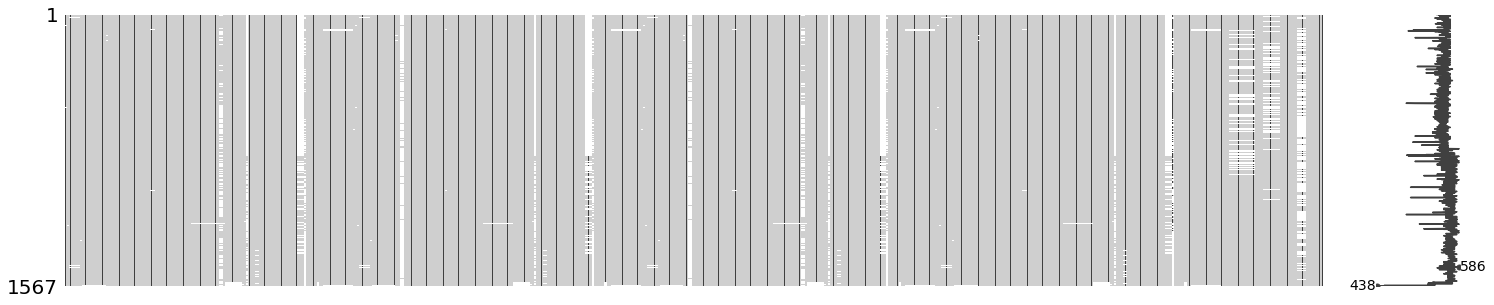

In [ ]:
# Visualizar missing
import missingno as msno
msno.matrix(X_train, figsize=(25,5));

In [ ]:
# Verificar missing por linha
percent_missing_rows = X_train.apply(lambda x: x.isnull().sum() * 100 / len(X_train), axis=1).sort_values(ascending=False)
df = pd.DataFrame({'row_index': X_train.index, 'percent_missing': percent_missing_rows})
df.head()

,row_index,percent_missing
1566,0,9.700064
1564,1,9.444799
1561,2,8.934269
1152,3,6.381621
511,4,6.381621


In [ ]:
percent_missing = X_train.apply(lambda x: x.isnull().sum() * 100 / len(X_train), axis=0).sort_values(ascending=False)
df = pd.DataFrame({'column_name': X_train.columns, 'percent_missing': percent_missing})
df.head(35)

,column_name,percent_missing
158,0,91.193363
157,1,91.193363
292,2,91.193363
293,3,91.193363
220,4,85.577537
492,5,85.577537
85,6,85.577537
358,7,85.577537
245,8,64.964901
518,9,64.964901


In [ ]:
# Classe tem missing?
y_train.isnull().sum()

0

In [ ]:
# Atributos com muitos missing: serão deletados.
att_to_delete = df[0:32].index.values
att_to_delete

array([158, 157, 292, 293, 220, 492,  85, 358, 245, 518, 517, 516, 244,
       109, 110, 111, 384, 383, 382, 246, 578, 579, 580, 581,  72, 346,
       345,  73, 247, 519, 112, 385])

In [ ]:
# deletar atributos
X_train.drop(att_to_delete, axis=1, inplace=True)
X_train.shape

(1567, 558)

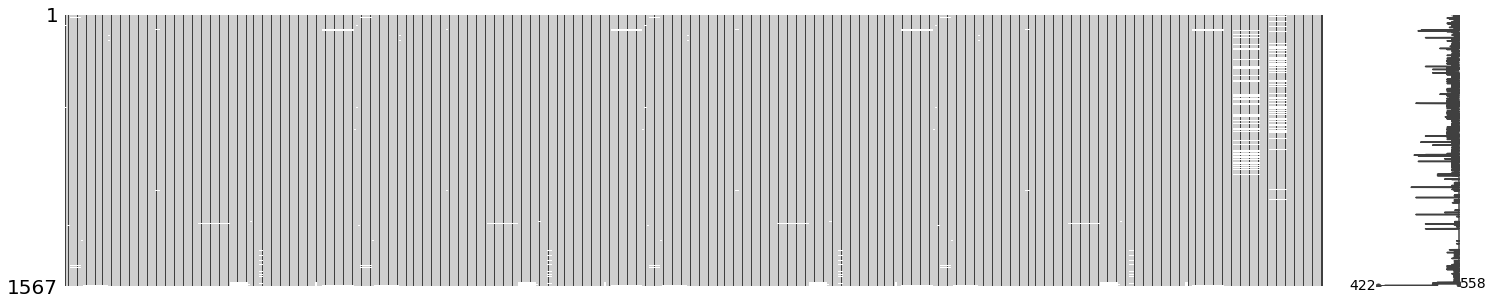

In [ ]:
# visualizar novamente os missing
msno.matrix(X_train, figsize=(25,5));

In [ ]:
# Imputar dados faltantes
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train)
X_train = imputer.transform(X_train)

In [ ]:
# Verificar se temos mais algum missing
print(np.isnan(X_train).sum())

0


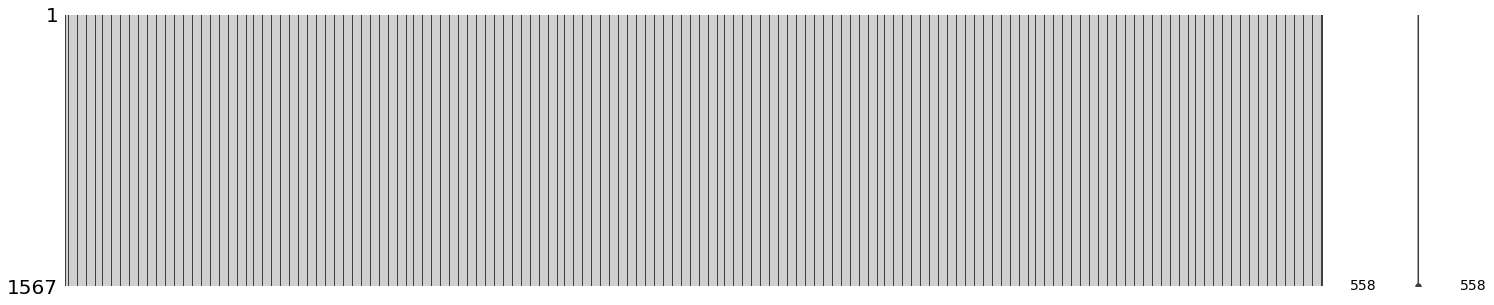

In [ ]:
# visualizar novamente os missing
msno.matrix(pd.DataFrame(X_train), figsize=(25,5));

In [ ]:
# remover colunas com variância zero
from sklearn.feature_selection import VarianceThreshold
zero_var_filter = VarianceThreshold()
X_train = zero_var_filter.fit_transform(X_train)

In [ ]:
# colunas com variância zero
(zero_var_filter.variances_ == 0).sum()

116

In [ ]:
# novo shape
pd.DataFrame(X_train).shape

(1567, 442)